In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_root = '/content/drive/My Drive/Colab Notebooks/dataset'

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk(data_root):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1009.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1003.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1001.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1008.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1006.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1007.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1004.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1000.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1005.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1002.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1015.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1013.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1014.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1019.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1018

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [30]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma','meningioma', 'pituitary']
for i in labels:
    folderPath = os.path.join(data_root, i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [31]:
X_train.ndim

4

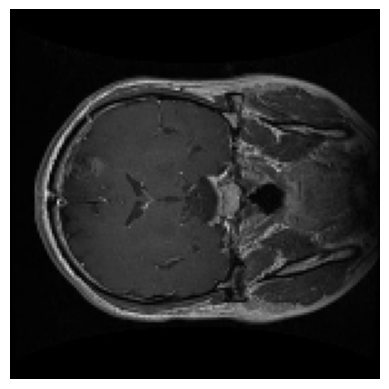

In [32]:
plt.axis('off')
plt.imshow(X_train[32])

In [33]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 2022)
X_train.shape

(3079, 150, 150, 3)

In [34]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    vertical_flip=True,
)

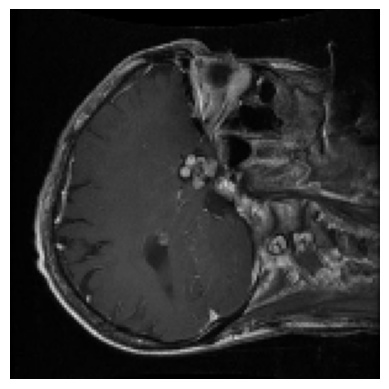

In [35]:
plt.axis('off')
plt.imshow(X_train[32])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.30, random_state = 2022)

In [37]:
len(X_train)

2155

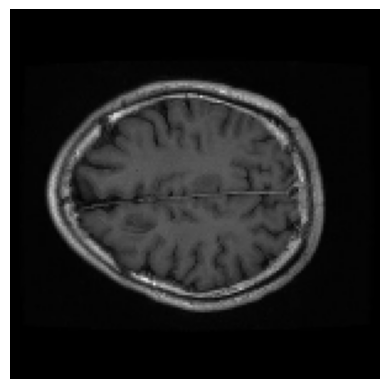

In [38]:
plt.axis('off')
plt.imshow(X_train[89])

In [39]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [40]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(3, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [42]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(0.0001), metrics=['accuracy'])

In [43]:
history = model.fit(train_datagen.flow(X_train, y_train), validation_data = (X_test, y_test), epochs=300, validation_split = 0.1, verbose = 1)

Epoch 1/300
68/68 [==============================] - 21s 189ms/step - loss: 1.1838 - accuracy: 0.4121 - val_loss: 1.0692 - val_accuracy: 0.5097
Epoch 2/300
68/68 [==============================] - 13s 190ms/step - loss: 0.9647 - accuracy: 0.5462 - val_loss: 0.8605 - val_accuracy: 0.6115
Epoch 3/300
68/68 [==============================] - 13s 190ms/step - loss: 0.8508 - accuracy: 0.6130 - val_loss: 0.7768 - val_accuracy: 0.6991
Epoch 4/300
68/68 [==============================] - 13s 193ms/step - loss: 0.7810 - accuracy: 0.6515 - val_loss: 0.7520 - val_accuracy: 0.6742
Epoch 5/300
68/68 [==============================] - 13s 197ms/step - loss: 0.7664 - accuracy: 0.6432 - val_loss: 0.7104 - val_accuracy: 0.7284
Epoch 6/300
68/68 [==============================] - 13s 191ms/step - loss: 0.7290 - accuracy: 0.6826 - val_loss: 0.7570 - val_accuracy: 0.6039
Epoch 7/300
68/68 [==============================] - 13s 190ms/step - loss: 0.7231 - accuracy: 0.6631 - val_loss: 0.6868 - val_accuracy:

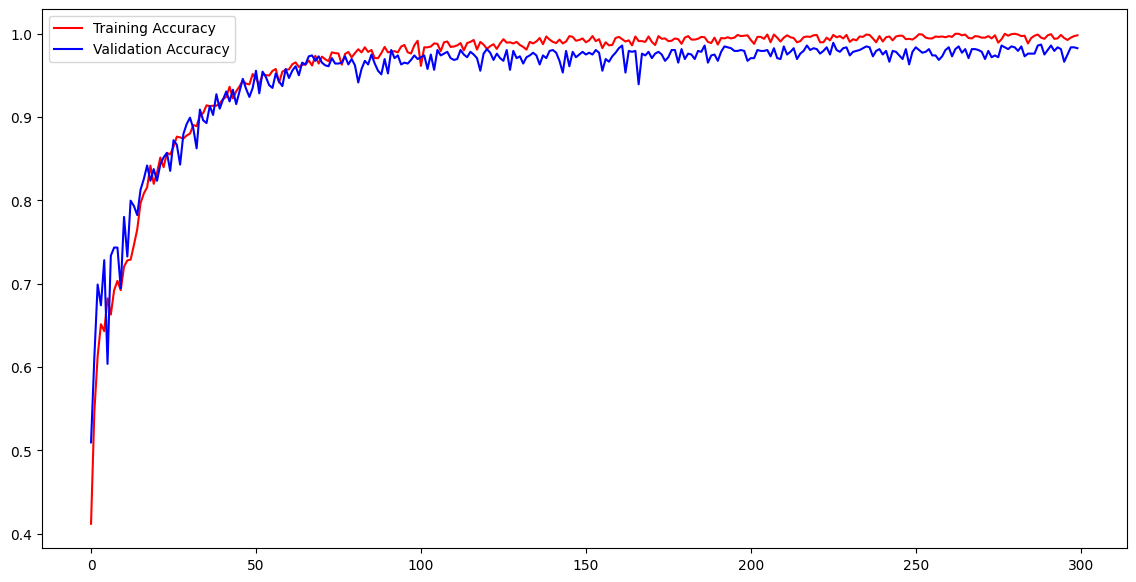

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

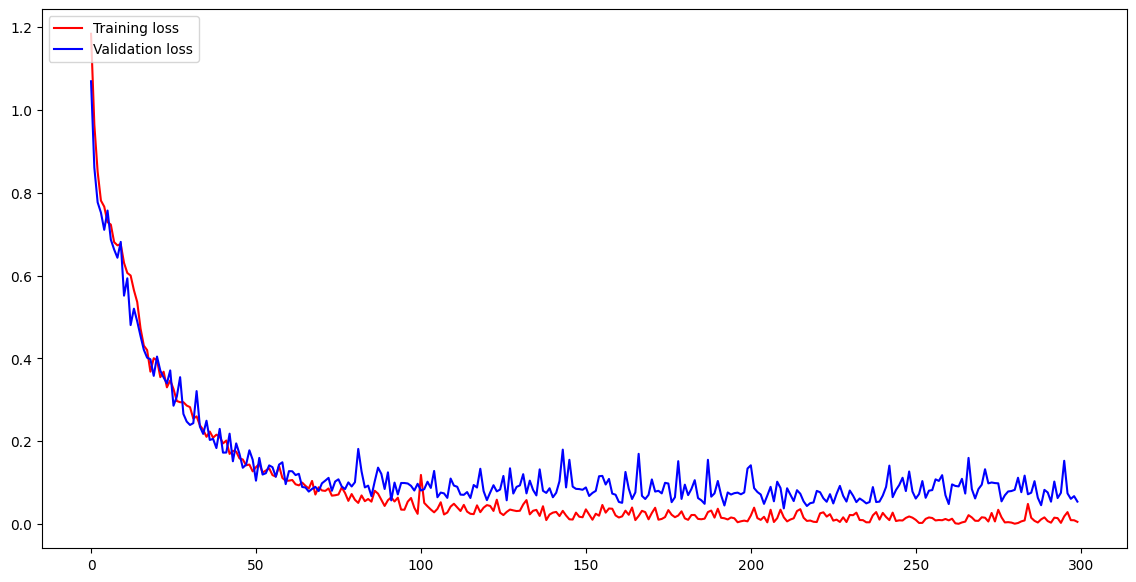

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [46]:
y_pred = model.predict(X_test)
y_pred

29/29 [==============================] - 1s 24ms/step


array([[1.0000000e+00, 1.0393329e-13, 3.1181280e-13],
       [9.9999952e-01, 4.6248607e-07, 7.1599747e-13],
       [1.6814231e-14, 1.0785700e-11, 1.0000000e+00],
       ...,
       [1.0000000e+00, 4.4793698e-09, 1.0481195e-14],
       [1.8214404e-09, 1.6076854e-09, 1.0000000e+00],
       [2.4285418e-07, 7.0393951e-12, 9.9999976e-01]], dtype=float32)

In [47]:
a = y_pred[500]
indices = a.argmax()

if indices == 0:
    print('glioma_tumor')
elif indices == 1:
    print('meningioma_tumor')
elif indices == 2:
    print('pituitary_tumor')
else:
    print('Error in predicting the type of tumor')

pituitary_tumor


In [48]:
y_pred_labels = np.argmax(y_pred, axis = 1)
y_pred_labels

array([0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 1,
       1, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1,
       0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0,
       1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       1, 1, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1,
       0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1,
       0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2,
       2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 0, 1, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 2, 0,

In [49]:
y_test_new[500]

2

In [50]:
score = accuracy_score(y_test_new, np.argmax(model.predict(X_test), axis = 1))
score

29/29 [==============================] - 1s 21ms/step


0.9826839826839827

In [51]:
loss, metrics = model.evaluate(X_test, y_test)
loss, metrics

29/29 [==============================] - 1s 23ms/step - loss: 0.0541 - accuracy: 0.9827


(0.05412647873163223, 0.9826839566230774)

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new, y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       439
           1       0.96      0.97      0.96       206
           2       0.99      1.00      0.99       279

    accuracy                           0.98       924
   macro avg       0.98      0.98      0.98       924
weighted avg       0.98      0.98      0.98       924

